# An√°lise de Dados da Fatal Model com PySpark
## Sophia Katze de Paula, Jun/2025

Este notebook apresenta a an√°lise dos dados **users** e **user_transactions**, executando queries SQL via Pandas e PandaSQL, realizando uma simula√ß√£o Monte Carlo de descontos.

## 1.1 Imports e Setup

Import das bibliotecas necess√°rias, bem como de ajuste nas tabelas

In [1]:
# 1. Carregamento Completo e Otimizado com Pandas
# Autora: Sophia Katze de Paula ‚Äì 2025-06-11

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
import os
import sys
import py7zr  

# Configura√ß√µes gerais
pd.set_option('display.max_columns', None)
sns.set_theme(style='whitegrid')

#Unzip do Dataset
py7zr.SevenZipFile(r'data/datasets.7z', mode='r').extractall(path=r'data/')

# Carregando os dados 
df_transactions_raw = pd.read_csv(r'data/user_transaction_items_retificado2.csv')
df_users_raw = pd.read_csv(r'data/users.csv')

# Remover espa√ßos dos nomes das colunas e converter para min√∫sculas
df_transactions_raw.columns = df_transactions_raw.columns.str.replace(' ', '_').str.lower()
df_users_raw.columns = df_users_raw.columns.str.replace(' ', '_').str.lower()


# Exibir os novos nomes das colunas
print("Colunas de df_items:")
print(df_transactions_raw.columns.tolist())

print("\nColunas de df_users:")
print(df_users_raw.columns.tolist())

# Ap√≥s carregar os DataFrames df_transaction e df_users:
env_init = {
    'transactions_raw': df_transactions_raw,
    'users_raw': df_users_raw
}


Colunas de df_items:
['created_at', 'approved_at', 'uf', 'payment_method', 'period', 'quantity', 'transaction_total_items', 'plan', 'initial_purchase', 'full_value', 'transaction_paid_value', 'paid_value', 'transaction_id', 'user_id', 'userable_id', 'discount_percent']

Colunas de df_users:
['ad_id', 'user_id', 'data_criado', 'data_primeira_mdc_aprovada', 'status_descricao', 'quantidade_planos_ativos', 'seguidores', 'cidade', 'uf', 'data_deletado', 'ultimo_visto', 'data_primeira_compra', 'data_ultima_compra', 'quantidade_de_compras', 'total_investido', 'posts', 'posts_ativos', 'videos_ativos', 'data_desabilitado', 'data_desabilitado_ate', 'status_documentos']


In [2]:
def exec_sql(sql_filename: str, env: dict) -> pd.DataFrame:
    """
    L√™ um arquivo .sql da pasta ../sql e executa a query via pandasql.

    Args:
        sql_filename (str): Nome do arquivo .sql (ex: '01_user_status.sql').
        env (dict): Dicion√°rio de DataFrames dispon√≠veis para a query
                    (ex: {'df_transacoes': df_transacoes, 'df_usuarios': df_usuarios}).

    Returns:
        pd.DataFrame: Resultado da consulta.
    """
    # Monta o caminho completo relativo ao notebook em notebooks/
    path = os.path.join('sql', sql_filename)
    with open(path, 'r', encoding='utf-8') as f:
        query = f.read()
    # Executa a query no contexto dos DataFrames fornecidos
    return sqldf(query, env)

# Exemplo de uso:
# env = {'df_transacoes': df_transacoes, 'df_usuarios': df_usuarios}
# df_status = exec_sql('01_user_status.sql', env)

## 1.2 Limpeza dos dados

Tratamento de Null's e Duplicados

In [3]:
print("Total rows users: ", df_users_raw.shape[0])
print("Total rows transactions: ", df_transactions_raw.shape[0])

Total rows users:  814354
Total rows transactions:  1048575


In [4]:
# Print nulls and duplicates for df_users_raw
print("Nulls in df_users_raw:")
print(df_users_raw.isnull().sum())
print("\nDuplicates in df_users_raw:")
print(df_users_raw.duplicated().sum())


Nulls in df_users_raw:
ad_id                              0
user_id                            0
data_criado                        0
data_primeira_mdc_aprovada    672943
status_descricao                   0
quantidade_planos_ativos           0
seguidores                         0
cidade                        206314
uf                            206314
data_deletado                 585594
ultimo_visto                  138828
data_primeira_compra          739959
data_ultima_compra            739959
quantidade_de_compras              0
total_investido                    0
posts                              0
posts_ativos                       0
videos_ativos                      0
data_desabilitado             798380
data_desabilitado_ate         798383
status_documentos             466562
dtype: int64

Duplicates in df_users_raw:
1


In [5]:
# Print nulls and duplicates for df_transactions_raw  
print("Nulls in df_transactions_raw:")
print(df_transactions_raw.isnull().sum())
print("\nDuplicates in df_transactions_raw:")
print(df_transactions_raw.duplicated().sum())

Nulls in df_transactions_raw:
created_at                      0
approved_at                 14106
uf                              0
payment_method                  0
period                     147630
quantity                        0
transaction_total_items     49362
plan                            0
initial_purchase            14106
full_value                      6
transaction_paid_value      49362
paid_value                      6
transaction_id              11595
user_id                         0
userable_id                     0
discount_percent               13
dtype: int64

Duplicates in df_transactions_raw:
488


In [6]:
#Executamos os SQL de limpeza
df_transactions = exec_sql('clean_user_transactions.sql', env_init)
df_users = exec_sql('clean_users.sql', env_init)

# Ap√≥s carregar os DataFrames df_transaction e df_users:
env = {
    'user_transactions': df_transactions,
    'users': df_users
}

In [7]:
# Print nulls and duplicates for df_users
print("Nulls in df_users_raw:")
print(df_users_raw.isnull().sum())
print("\nDuplicates in df_users_raw:")
print(df_users_raw.duplicated().sum())

Nulls in df_users_raw:
ad_id                              0
user_id                            0
data_criado                        0
data_primeira_mdc_aprovada    672943
status_descricao                   0
quantidade_planos_ativos           0
seguidores                         0
cidade                        206314
uf                            206314
data_deletado                 585594
ultimo_visto                  138828
data_primeira_compra          739959
data_ultima_compra            739959
quantidade_de_compras              0
total_investido                    0
posts                              0
posts_ativos                       0
videos_ativos                      0
data_desabilitado             798380
data_desabilitado_ate         798383
status_documentos             466562
dtype: int64

Duplicates in df_users_raw:
1


In [8]:
# Print nulls and duplicates for df_transactions
print("Nulls in df_transactions:")
print(df_transactions.isnull().sum())
print("\nDuplicates in df_transactions:")
print(df_transactions.duplicated().sum())

Nulls in df_transactions:
created_at                    0
approved_at                2495
uf                            0
payment_method                0
period                        0
quantity                      0
plan                          0
initial_purchase              0
full_value                    0
transaction_paid_value    37808
paid_value                    0
transaction_id                0
user_id                       0
userable_id                   0
discount_percent              0
is_approved                   0
dtype: int64

Duplicates in df_transactions:
0


Considerando que os NULL's representam grande parte do dataset, e analisando as queries que vamos fazer, n√£o vamos usar as colunas com NULLs, por√©m um ponto de aten√ß√£o no futuro √© fazer um plano de a√ß√£o para fazer o registro desses dados

## 2. Desafio 1.1: Taxa de Usu√°rios por Status

Qual a propor√ß√£o de usu√°rios ativos, onboarding, desabilitados e deletados?

In [9]:
# Executa arquivo sql/01_user_status.sql
df_status = exec_sql('01_user_status.sql', env)
df_status

status_descricao  qtd_status  pct_status
0                            Onboarding      511169       62.77
1                              Deletado      222430       27.31
2                                 Ativo       44671        5.49
3                          MDC Expirada       10212        1.25
4                          Desabilitado        7802        0.96
5                                 Delay        6484        0.80
6                                Banido        6330        0.78
7                             Deprecado        2969        0.36
8                         MDC Reprovada         951        0.12
9   Erro - Status 20 e deleted_at vazio         605        0.07
10                             Suspenso         408        0.05
11                           Indefinido         322        0.04

**Insight:** A sa√∫de da base √© medida por X% ativos e Y% banidos, direcionando estrat√©gias de reten√ß√£o e reengajamento.

## 3. Desafio 1.2: Padr√£o de Compras e Sazonalidade

Como variam as compras e receita ao longo do tempo?## 3. Desafio 1.2: Padr√£o de Compras e Sazonalidade

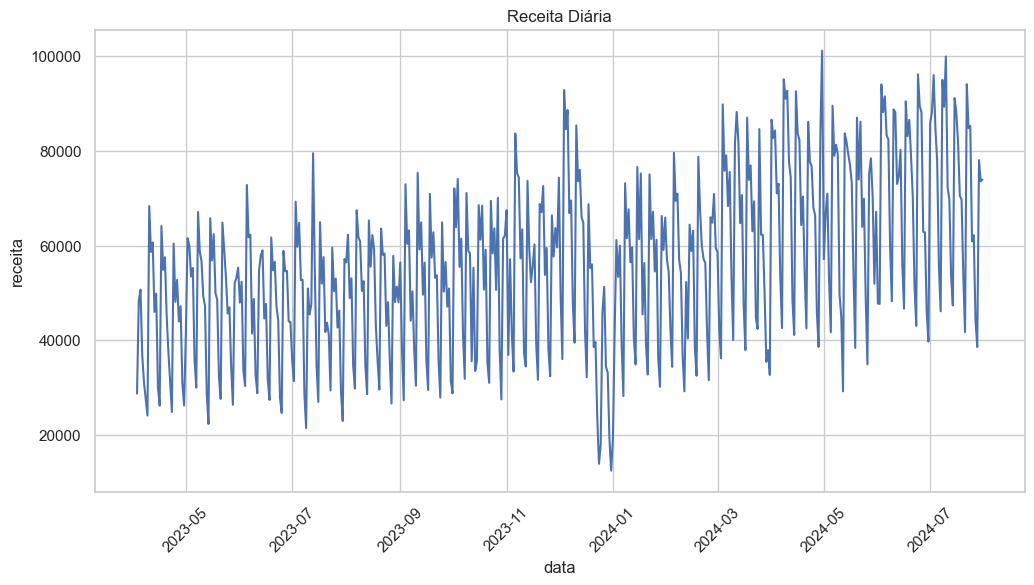

In [10]:
# Executa arquivo sql/02_daily_sales.sql
df_daily = exec_sql('02_daily_sales.sql', env)

# Converte a coluna para datetime se necess√°rio
df_daily['data'] = pd.to_datetime(df_daily['data'])

#Plotando
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='data', y='receita')
plt.xticks(rotation=45)
plt.title('Receita Di√°ria')
plt.show()

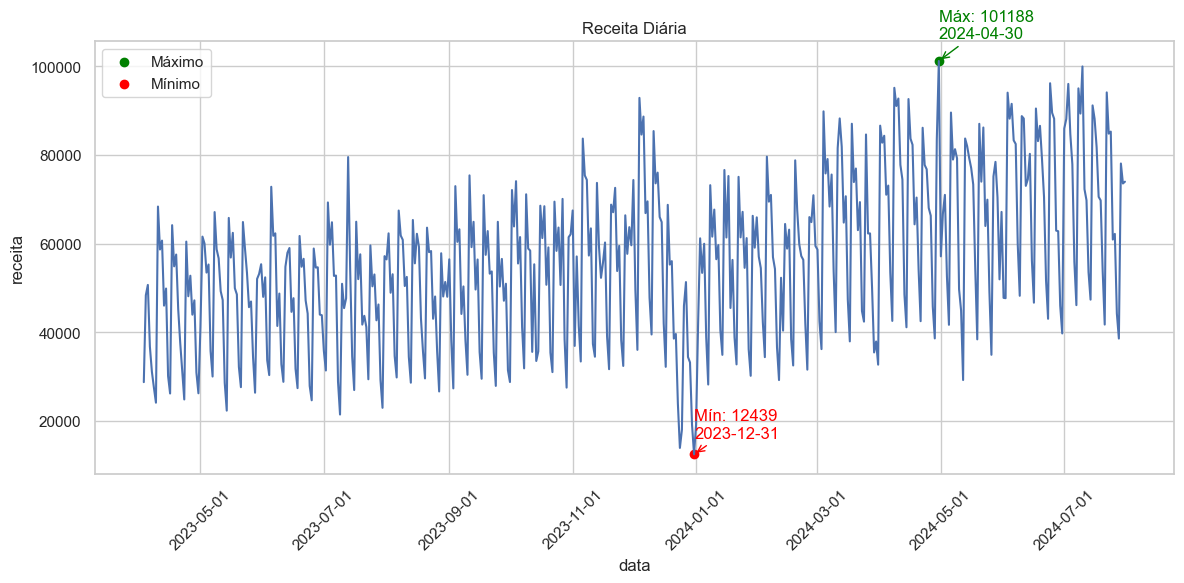

In [11]:
import matplotlib.dates as mdates
#O obejtivo √© encontrar e indicar no gr√°fico max e min e respectivas datas

# Encontra o valor m√°ximo e m√≠nimo
max_row = df_daily.loc[df_daily['receita'].idxmax()]
min_row = df_daily.loc[df_daily['receita'].idxmin()]

# Plot principal
plt.figure(figsize=(12,6))
sns.lineplot(data=df_daily, x='data', y='receita')

# Destaques
plt.scatter([max_row['data']], [max_row['receita']], color='green', label='M√°ximo')
plt.scatter([min_row['data']], [min_row['receita']], color='red', label='M√≠nimo')

# Anota√ß√µes
plt.annotate(f"M√°x: {max_row['receita']:.0f}\n{max_row['data'].date()}",
             xy=(max_row['data'], max_row['receita']),
             xytext=(max_row['data'], max_row['receita'] * 1.05),
             arrowprops=dict(arrowstyle="->", color='green'),
             color='green')

plt.annotate(f"M√≠n: {min_row['receita']:.0f}\n{min_row['data'].date()}",
             xy=(min_row['data'], min_row['receita']),
             xytext=(min_row['data'], min_row['receita'] * 1.3),
             arrowprops=dict(arrowstyle="->", color='red'),
             color='red')

# Eixo x formatado
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.title('Receita Di√°ria')
plt.legend()
plt.tight_layout()
plt.show()


## 4. Desafio 1.2.1: Agregado por Dia do M√™s
Quais dias do m√™s t√™m maior volume de vendas?

C:\Users\sophia\AppData\Local\Temp\ipykernel_10912\390228205.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_dia_mes, x='dia_do_mes', y='receita', palette='viridis')


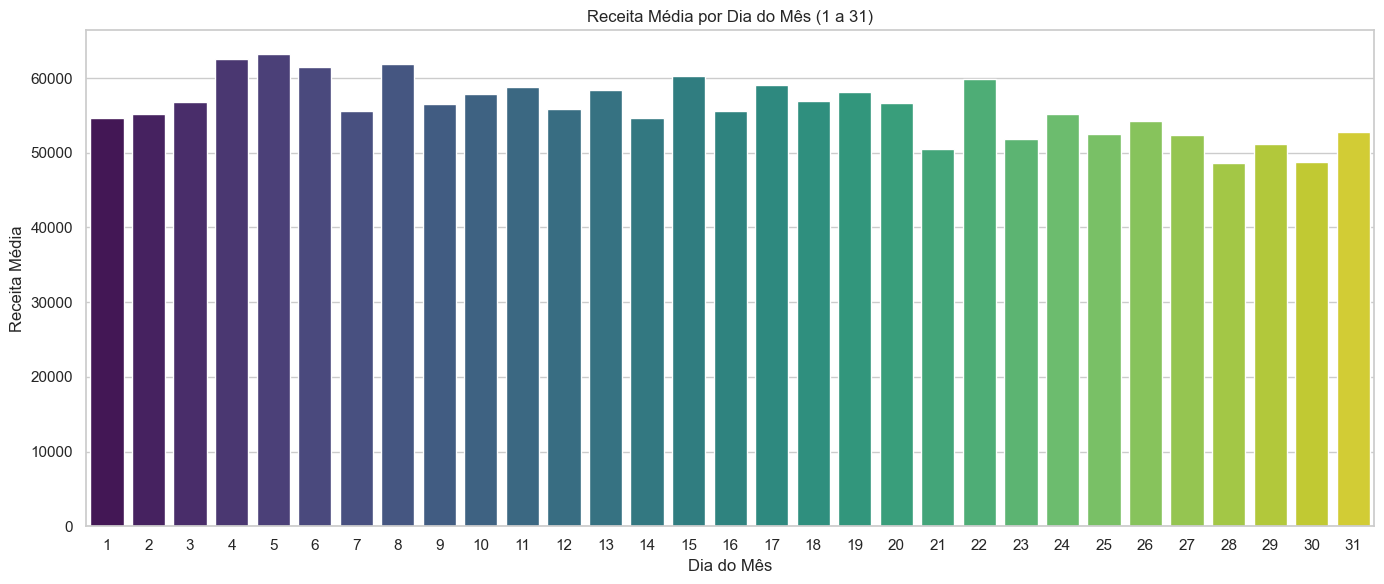

In [12]:
# Garante que a coluna 'data' est√° em datetime
df_daily['data'] = pd.to_datetime(df_daily['data'])

# Extrai o dia do m√™s
df_daily['dia_do_mes'] = df_daily['data'].dt.day

# Agrega receita m√©dia por dia do m√™s
df_dia_mes = df_daily.groupby('dia_do_mes')['receita'].mean().reset_index()

#Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=df_dia_mes, x='dia_do_mes', y='receita', palette='viridis')

plt.title('Receita M√©dia por Dia do M√™s (1 a 31)')
plt.xlabel('Dia do M√™s')
plt.ylabel('Receita M√©dia')
plt.xticks(range(0, 31), [str(i+1) for i in range(31)])
plt.tight_layout()
plt.show()


## 4. Desafio 1.2.2: Sazonalidade por Dias da Semana
H√° diferen√ßa de receita entre dias √∫teis e finais de semana?

C:\Users\sophia\AppData\Local\Temp\ipykernel_10912\1112912642.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weekday, x='dia_semana_nome', y='receita', palette='crest')


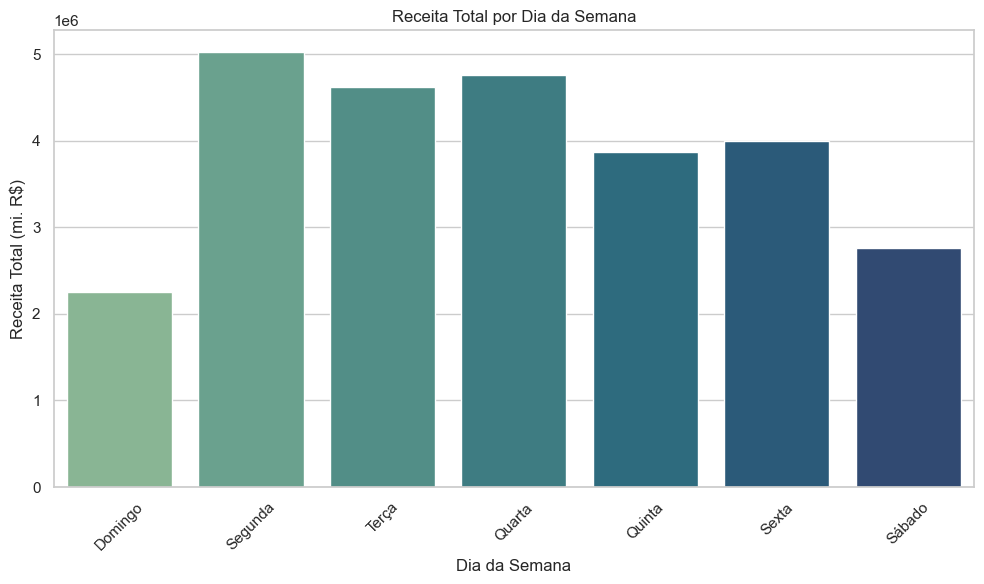

In [13]:
# Executa SQL de vendas por dia da semana
df_weekday = exec_sql('03_sales_by_weekday.sql', env)

# Ordena corretamente os dias da semana em portugu√™s
dias_ordenados = ['Domingo', 'Segunda', 'Ter√ßa', 'Quarta', 'Quinta', 'Sexta', 'S√°bado']
df_weekday['dia_semana_nome'] = pd.Categorical(df_weekday['dia_semana_nome'], categories=dias_ordenados, ordered=True)
df_weekday = df_weekday.sort_values('dia_semana_nome')

# Plotagem
plt.figure(figsize=(10,6))
sns.barplot(data=df_weekday, x='dia_semana_nome', y='receita', palette='crest')
plt.title('Receita Total por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Receita Total (mi. R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Posteriormente uma outra an√°lise que √© poss√≠vel fazer √© de Dias Normais x Feriado

## 4. Desafio 1.3: Usu√°rios Pagantes e ARPU

Quantos usu√°rios pagam e quanto em m√©dia gastam?

In [14]:
# Executa arquivo sql/04_spend_per_user.sql
df_arpu = exec_sql('04_spend_per_user.sql', env)
df_arpu

total_users  paying_users  pct_paying    arpu
0       814353         40589        4.98  672.27

## 5. Desafio 1.4: Faturamento Mensal

Qual a performance de receita m√™s a m√™s?

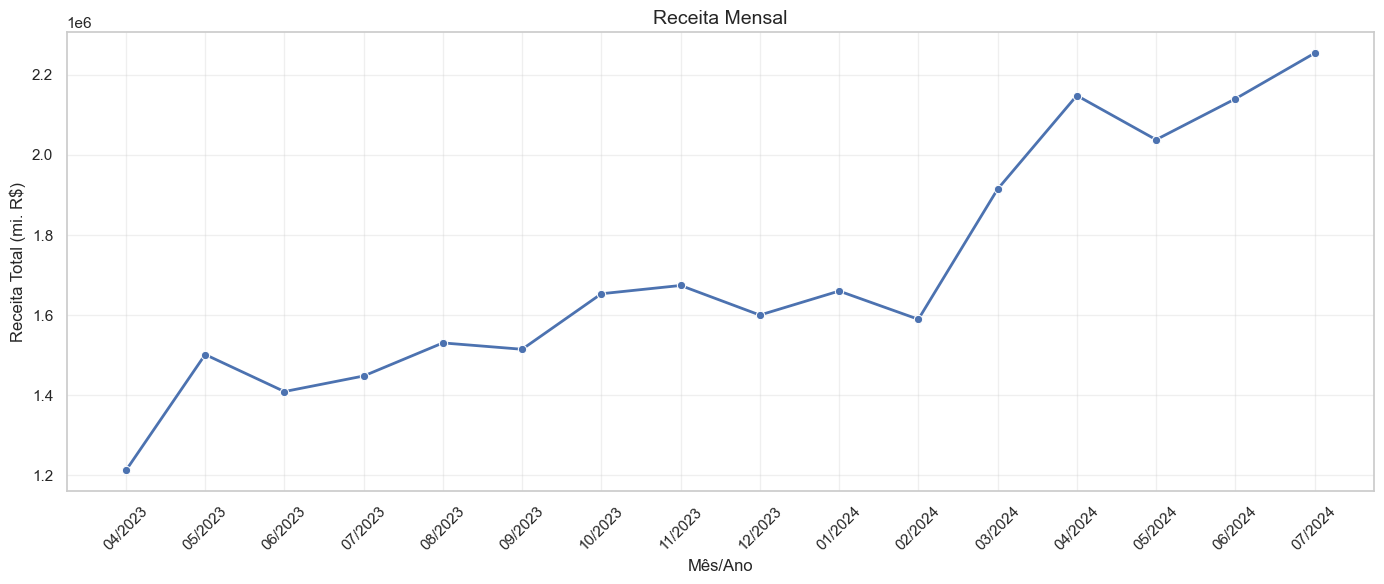

In [15]:
# Executa arquivo sql/05_monthly_revenue.sql
df_monthly = exec_sql('05_monthly_revenue.sql', env)

# Criar gr√°fico de linha mensal
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='mes_ano', y='receita', marker='o', linewidth=2)
plt.xticks(rotation=45)
plt.title('Receita Mensal', fontsize=14)
plt.xlabel('M√™s/Ano', fontsize=12)
plt.ylabel('Receita Total (mi. R$)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 6. Desafio 2.1: Identifica√ß√£o da Promo√ß√£o

Quando ocorreu a promo√ß√£o de 85% de desconto?

In [16]:
# Executa arquivo sql/06_promotion_period.sql
df_promo = exec_sql('06_promotion_period.sql', env)
df_promo

data_transacao  total_primeiras_compras  compras_com_desconto  \
0      2024-05-07                       90                    79   
1      2024-05-08                      102                    92   
2      2024-05-09                       74                    64   
3      2024-05-10                       79                    71   
4      2024-05-11                       39                    35   
5      2024-05-13                       67                    61   
6      2024-05-14                       76                    67   
7      2024-05-15                       85                    76   
8      2024-05-16                       60                    55   
9      2024-05-19                       32                    30   
10     2024-05-20                       85                    76   
11     2024-05-21                       71                    65   
12     2024-05-22                       92                    83   
13     2024-05-23                       61                    56   
14     2024-05-24                       63                    59   
15     2024-05-25                       29                    29   
16     2024-05-27                       71                    65   
17     2024-05-28                       61                    55   
18     2024-05-29                       64                    59   
19     2024-05-30                       45                    41   
20     2024-05-31                       63                    57   
21     2024-06-01                       38                    34   
22     2024-06-03                       83                    78   
23     2024-06-04                       69                    63   
24     2024-06-05                       87                    80   
25     2024-06-06                      109                    96   
26     2024-06-07                       96                    87   
27     2024-06-09                       32                    30   
28     2024-06-10                      110                   100   
29     2024-06-11                      133                   116   
30     2024-06-14                       78                    68   

    taxa_promocional_pct  dia_consecutivo  
0                  87.78                0  
1                  90.20                1  
2                  86.49                1  
3                  89.87                1  
4                  89.74                1  
5                  91.04                0  
6                  88.16                1  
7                  89.41                1  
8                  91.67                1  
9                  93.75                0  
10                 89.41                1  
11                 91.55                1  
12                 90.22                1  
13                 91.80                1  
14                 93.65                1  
15                100.00                1  
16                 91.55                0  
17                 90.16                1  
18                 92.19                1  
19                 91.11                1  
20                 90.48                1  
21                 89.47                1  
22                 93.98                0  
23                 91.30                1  
24                 91.95                1  
25                 88.07                1  
26                 90.63                1  
27                 93.75                0  
28                 90.91                1  
29                 87.22                1  
30                 87.18                0

In [17]:
df_promo['data_transacao']=pd.to_datetime(df_promo['data_transacao'])

# Define o in√≠cio e fim do per√≠odo promocional
inicio_promocao = df_promo['data_transacao'].min()
fim_promocao = df_promo['data_transacao'].max()

print(f"In√≠cio da promo√ß√£o: {inicio_promocao.date()}")
print(f"Fim da promo√ß√£o: {fim_promocao.date()}")

In√≠cio da promo√ß√£o: 2024-05-07
Fim da promo√ß√£o: 2024-06-14


## 7. Desafio 2.2: Impacto da Promo√ß√£o

Como a receita e o n√∫mero de transa√ß√µes mudaram?

In [18]:
# Executa arquivo sql/07_promotion_impact.sql
df_impact = exec_sql('07_promotion_impact.sql', env)
df_impact

periodo  total_usuarios  usuarios_pagantes  receita_total  \
0    antes           17611              17221   584883.69731   
1  durante            2628               2628    56945.55740   
2   depois            2558               2558    88657.74281   

   receita_media_por_pagante  
0                      33.96  
1                      21.67  
2                      34.66

## 8. Desafio 2.3: Impacto da Promo√ß√£o, parte 2

üßÆ **Valeu a pena?**

A promo√ß√£o reduziu fortemente a **receita m√©dia por comprador** (de **R$‚ÄØ33,96** para **R$‚ÄØ21,67**) e a **receita total durante o per√≠odo** foi proporcionalmente **baixa**, mesmo considerando que o per√≠odo de promo√ß√£o foi provavelmente **menor que o ‚Äúantes‚Äù**.  
‚û°Ô∏è Em outras palavras, **cada real de desconto gerado n√£o foi compensado pelo volume extra de primeiras compras**.

---

üß™ **Pr√≥ximas an√°lises recomendadas**

- üìä **Normalizar por dura√ß√£o**  
  ‚Üí Comparar **receita‚ÄØ/‚ÄØdia** em cada janela para ter certeza de propor√ß√µes justas.

- üë• **Taxa de aquisi√ß√£o de novos usu√°rios**  
  ‚Üí Quantos **novos cadastros** (n√£o apenas compras) vieram em ‚Äúdurante‚Äù versus ‚Äúantes‚Äù?

- üîÑ **Taxa de convers√£o e reten√ß√£o**  
  ‚Üí Esses **primeiros compradores promocionais voltaram a comprar**?

- üìà **Elasticidade de pre√ßo**  
  ‚Üí Modelar a rela√ß√£o entre **n√≠vel de desconto** e **receita por usu√°rio** para encontrar o _sweet spot_ ‚Äî  
    Pode ser que **85% seja muito profundo**, mas **30‚Äì50%** gere volume sem canibalizar tanto margem.

- üß© **Segmenta√ß√£o**  
  ‚Üí Ver se o efeito **difere por plano, UF ou m√©todo de pagamento**.

---

üìå **Conclus√£o:**  
A promo√ß√£o de **85%** **n√£o foi financeiramente vantajosa** no formato em que foi aplicada.  
Sugere-se a realiza√ß√£o de **testes mais granulares de desconto** (ex.: 30%, 50%, 70%) e an√°lise de **LTV dos usu√°rios captados**.


## 8. Desafio 2.4: Simula√ß√£o Monte Carlo de Desconto Ideal

Executamos a simula√ß√£o para recomendar desconto ideal.

Taxa de Convers√£o Baseline: 3.92%
Taxa de Convers√£o na Promo√ß√£o de 85.0%: 11.29%



c:\Sophie\Coding\Atuais\data-analyst-test-01-martech\scripts\promo_simulation.py:143: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(



=========================== RESULTADOS DA SIMULA√á√ÉO ============================
üìà Melhor desconto para maximizar a receita: 20%
üí∞ Receita mediana estimada com este desconto: R$298,659.30
üí∏ Receita mediana do cen√°rio baseline (sem promo√ß√£o): R$294,470.84
üöÄ Impacto estimado sobre o baseline: +1.42%


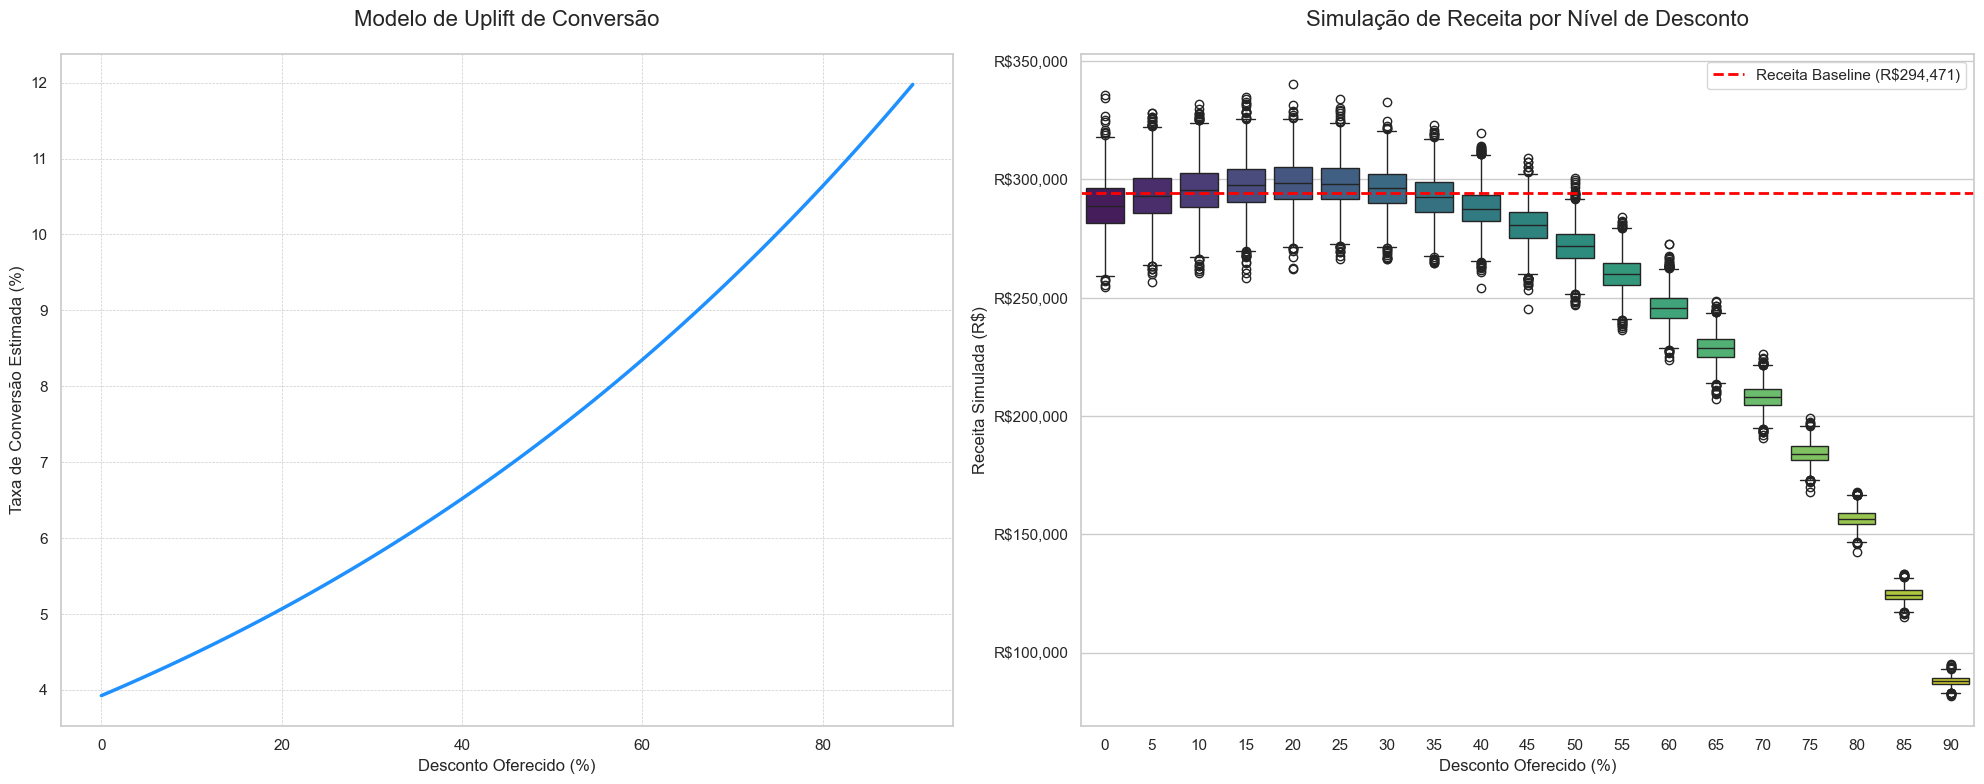

In [19]:
# 8. Executa Simula√ß√£o Monte Carlo CORRIGIDA para Otimiza√ß√£o de Desconto

from scripts.promo_simulation import (
    modelar_uplift_conversao,
    simular_receita_com_uplift,
    analisar_simulacao,
    plotar_resultados_simulacao
)
import pandas as pd
import numpy as np

# --- SETUP: Prepara√ß√£o dos Dados (Esta parte depende da sua an√°lise anterior) ---
# NOTA: Usando dados sint√©ticos para demonstra√ß√£o. Substitua pelos seus dataframes reais.

# Per√≠odo da promo√ß√£o (assumindo que foi identificado na etapa anterior)
periodo_promo_inicio = pd.to_datetime('2024-03-15')
periodo_promo_fim = pd.to_datetime('2024-04-15')
duracao_periodo_dias = (periodo_promo_fim - periodo_promo_inicio).days

# --- Cen√°rio Baseline (Ex: per√≠odo de 31 dias ANTES da promo√ß√£o) ---
periodo_base_inicio = periodo_promo_inicio - pd.Timedelta(days=duracao_periodo_dias)
periodo_base_fim = periodo_promo_inicio - pd.Timedelta(days=1)

# Simula√ß√£o de dados de usu√°rios e transa√ß√µes (SUBSTITUIR PELOS SEUS DADOS)
np.random.seed(42)
total_users = 50000
users_ativos_base = pd.Index(range(20000))
users_ativos_promo = pd.Index(range(20000, 40000))
transacoes_base = pd.DataFrame({
    'user_id': np.random.choice(users_ativos_base, 800), # ~4% de convers√£o
    'valor_bruto': np.random.lognormal(mean=3.5, sigma=0.4, size=800) * 10
})
transacoes_promo = pd.DataFrame({
    'user_id': np.random.choice(users_ativos_promo, 2400), # ~12% de convers√£o (uplift de 3x)
    'valor_bruto': np.random.lognormal(mean=3.6, sigma=0.4, size=2400) * 10 # Valor um pouco maior
})

# --- 1. Calcular Par√¢metros Essenciais para a Simula√ß√£o ---

# a) Taxas de convers√£o (usu√°rios √∫nicos que compraram / usu√°rios ativos no per√≠odo)
n_usuarios_potenciais = len(users_ativos_base) # Assume popula√ß√µes de mesmo tamanho para compara√ß√£o
taxa_conversao_base = transacoes_base['user_id'].nunique() / n_usuarios_potenciais
taxa_conversao_promo_observada = transacoes_promo['user_id'].nunique() / len(users_ativos_promo)
desconto_promo_observado = 85.0 # Desconto da promo√ß√£o original

print(f"Taxa de Convers√£o Baseline: {taxa_conversao_base:.2%}")
print(f"Taxa de Convers√£o na Promo√ß√£o de {desconto_promo_observado}%: {taxa_conversao_promo_observada:.2%}\n")

# b) Distribui√ß√£o de valor por transa√ß√£o (usamos o valor bruto, antes do desconto)
#    Idealmente, usar uma amostra de transa√ß√µes que n√£o seja da promo√ß√£o para evitar vi√©s.
dist_valor_transacao = transacoes_base['valor_bruto']

# c) Receita de baseline para compara√ß√£o
receita_baseline_mediana = transacoes_base['valor_bruto'].sum()


# --- 2. Modelar o Uplift e Executar a Simula√ß√£o ---

# a) Criar o modelo de uplift de convers√£o
modelo_uplift = modelar_uplift_conversao(
    taxa_conversao_base=taxa_conversao_base,
    taxa_conversao_promo=taxa_conversao_promo_observada,
    desconto_promo=desconto_promo_observado
)

# b) Definir o range de descontos para simular
descontos_para_simular = list(range(0, 91, 5)) # De 0% a 90% em passos de 5%

# c) Executar a simula√ß√£o de Monte Carlo
df_simulacao = simular_receita_com_uplift(
    n_usuarios_potenciais=n_usuarios_potenciais,
    dist_valor_transacao=dist_valor_transacao,
    modelo_uplift=modelo_uplift,
    descontos=descontos_para_simular,
    n_sim=3000 # Reduzido para rodar mais r√°pido, 5000 √© um bom n√∫mero
)


# --- 3. Analisar e Visualizar os Resultados ---
plotar_resultados_simulacao(
    df_sim=df_simulacao,
    modelo_uplift=modelo_uplift,
    descontos_avaliados=descontos_para_simular,
    receita_baseline=receita_baseline_mediana
)

---
## **Otimiza√ß√£o de Descontos: Da Simula√ß√£o √† Estrat√©gia de Neg√≥cio**
---

Nossa simula√ß√£o de Monte Carlo identificou, de forma robusta, que um **desconto de 20% √© o ponto ideal para maximizar a receita**, projetando um aumento de **+1,42%** sobre a baseline. Essa otimiza√ß√£o demonstra um equil√≠brio entre o **aumento da taxa de convers√£o**, que se mostra mais el√°stica em descontos maiores, e a **eros√£o natural do pre√ßo unit√°rio**. A baixa vari√¢ncia de receita para 20%, aliada √† assimetria da curva de receita ‚Äî que alerta para os riscos de descontos excessivos ‚Äî **refor√ßa a solidez dessa recomenda√ß√£o**.

---
### **Al√©m da Receita: Uma Vis√£o Estrat√©gica**

Embora o desconto de 20% seja o ponto de otimiza√ß√£o da receita, a decis√£o final de implementa√ß√£o deve ir al√©m dessa m√©trica. √â crucial integrar esta an√°lise com:

* **Lucratividade:** Avaliar as **margens de lucro** e o **impacto no lucro l√≠quido**. Um aumento na receita pode n√£o significar necessariamente um aumento proporcional no lucro.
* **Percep√ß√£o da Marca:** Considerar como descontos frequentes afetam a **percep√ß√£o de valor da marca** a longo prazo.
* **Valor do Tempo de Vida do Cliente (CLTV):** Analisar o **impacto estrat√©gico no CLTV**, pois promo√ß√µes constantes podem condicionar o comportamento de compra e reduzir a fidelidade.
* **Viabilidade Operacional:** Avaliar a **facilidade e os custos de execu√ß√£o** da campanha de desconto.

---
### **Pr√≥ximos Passos para um Sucesso Duradouro**

A simula√ß√£o de Monte Carlo oferece uma base anal√≠tica poderosa, mas a execu√ß√£o bem-sucedida requer uma abordagem multifacetada:

1.  **Valida√ß√£o Emp√≠rica (Testes A/B):** √â **fundamental validar** os resultados da simula√ß√£o atrav√©s de **testes A/B controlados** para confirmar o impacto real no comportamento do cliente.
2.  **An√°lise Aprofundada da Lucratividade:** Realizar um estudo detalhado do **impacto no lucro l√≠quido**, incorporando todos os custos e margens.
3.  **Estrat√©gias de Segmenta√ß√£o:** Explorar a **personaliza√ß√£o de descontos** para diferentes segmentos de clientes, otimizando o retorno com base em suas elasticidades de pre√ßo.
4.  **Monitoramento Cont√≠nuo:** Implementar um **sistema de monitoramento robusto** para adaptar proativamente a estrat√©gia de descontos conforme o mercado e o comportamento do consumidor evoluem.

---